In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import nquad,quad
import math as m

In [50]:
def f(x,y,z):
  return (x + y + z)/np.sqrt(2*x**2 + 4*y**2 + 5*z**2)

def zbounds(x,y) :
  return [0, np.sqrt(1- x**2 - y**2)]
def ybounds(x):
  return [0, np.sqrt(1 - x**2)]
def xbounds():
  return [0, 1]

i = nquad(lambda z,y,x:f(x,y,z),[zbounds,ybounds,xbounds])
print(i)


(0.4178153638027288, 1.4444117259783385e-08)


Задание №1


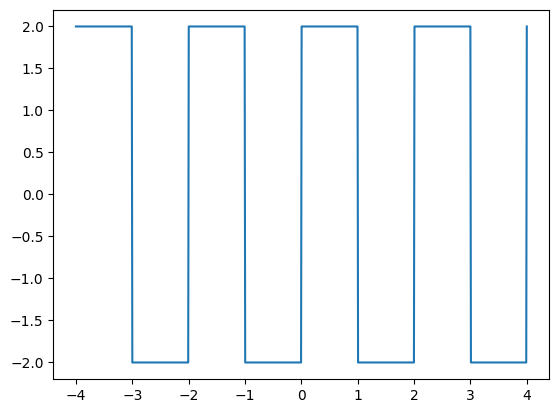

In [51]:
def f(x,A):
    if m.floor(x)%A==0:
        r = A
    else:
        r = -A
    return r

x = np.linspace(-4,4,800)
y = np.array([f(a,2) for a in x])
plt.plot(x,y)
plt.show()

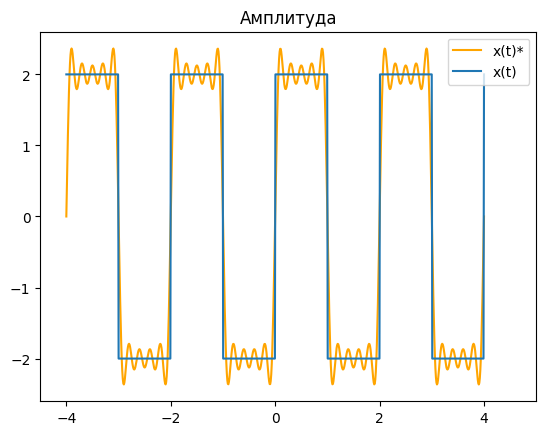

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def cos_nwt(n, w, t):
    return f(t, 2) * np.cos(n * w * t)

def a_n(n, w):
    T = 2
    t0 = 0
    T1 = 2 / T

    fumma = quad(lambda t: cos_nwt(n, w, t), t0, t0 + T)
    return T1 * fumma[0]

def sin_nwt(n, w, t):
    return f(t, 2) * np.sin(n * w * t)

def b_n(n, w):
    T = 2
    t0 = 0
    T1 = 2 / T

    fumma = quad(lambda t: sin_nwt(n, w, t), t0, t0 + T)
    return T1 * fumma[0]

def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

def x_x(w, N):
    a0 = a_n(0, w) / 2

    fsum = []
    x_values = np.linspace(-4, 4, 800)  # Создаем равномерную сетку значений x
    for t in x_values:
        summ = 0
        for n in range(1, N):
            summ += a_n(n, w) * np.cos(n * w * t) + b_n(n, w) * np.sin(n * w * t)
        f_sum = a0 + summ
        fsum.append(f_sum)

    return x_values, fsum

w = (2 * np.pi) / 2

x_values, x_o = x_x(w, 10)

plt.figure()
plt.plot(x_values, x_o, color='orange',label='x(t)*')
plt.plot(x, y, label='x(t)')
plt.xlim(-4.5, 5)  # Устанавливаем границы оси x
plt.legend(loc ='upper right')
plt.title('Амплитуда')
plt.show()


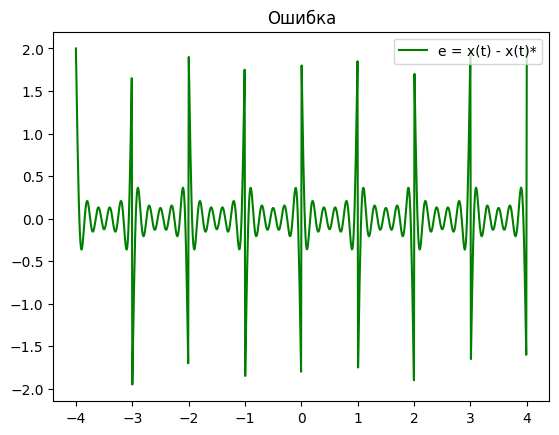

In [53]:
e = y - x_o
plt.plot(x, e, label='e = x(t) - x(t)*',color='green')
plt.legend(loc='upper right')
plt.title('Ошибка')

# Отображаем графики
plt.show()
# print(e)

Задание №2

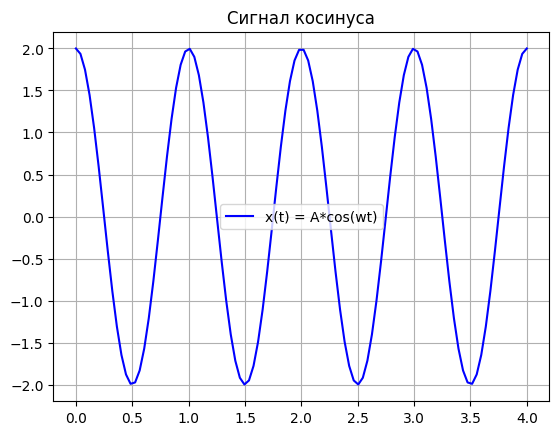

In [54]:
import numpy as np
import matplotlib.pyplot as plt


def cosinus(t,w,A):
    x_t = A * np.cos(w * t)
    return x_t 

f = 100  
T = 1 / f  
w = 2 * np.pi * f  
x = np.linspace(0, 4, 100)  
y = np.array([cosinus(a,w,2) for a in x])

# x_t = A * np.cos(w * t)

plt.plot(x,y, label='x(t) = A*cos(wt)', color='blue')
plt.title('Сигнал косинуса')
plt.grid(True)
plt.legend()
plt.show()


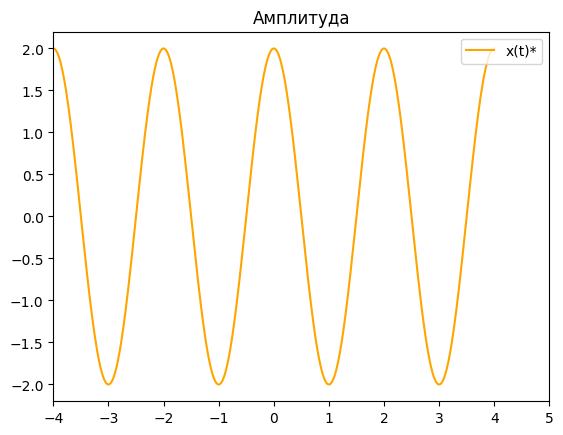

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def cos_nwt(n, w, t):
    return cosinus(t,w,2) * np.cos(n * w * t)

def a_n(n, w):
    T = 2
    t0 = 0
    T1 = 2 / T

    fumma = quad(lambda t: cos_nwt(n, w, t), t0, t0 + T)
    return T1 * fumma[0]

def sin_nwt(n, w, t):
    return cosinus(t,w, 2) * np.sin(n * w * t)

def b_n(n, w):
    T = 2
    t0 = 0
    T1 = 2 / T

    fumma = quad(lambda t: sin_nwt(n, w, t), t0, t0 + T)
    return T1 * fumma[0]

def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

def x_x(w, N):
    a0 = a_n(0, w) / 2

    fsum = []
    x_values = np.linspace(-4, 4, 800)  # Создаем равномерную сетку значений x
    for t in x_values:
        summ = 0
        for n in range(1, N):
            summ += a_n(n, w) * np.cos(n * w * t) + b_n(n, w) * np.sin(n * w * t)
        f_sum = a0 + summ
        fsum.append(f_sum)

    return x_values, fsum

w = (2 * np.pi) / 2

x_values, x_o = x_x(w, 10)

plt.figure()
plt.plot(x_values, x_o, color='orange',label='x(t)*')
# plt.plot(x, y, label='x(t)')
plt.xlim(-4, 5)  # Устанавливаем границы оси x
plt.legend(loc ='upper right')
plt.title('Амплитуда')
plt.show()


Text(0, 0.5, 'Амплитуда')

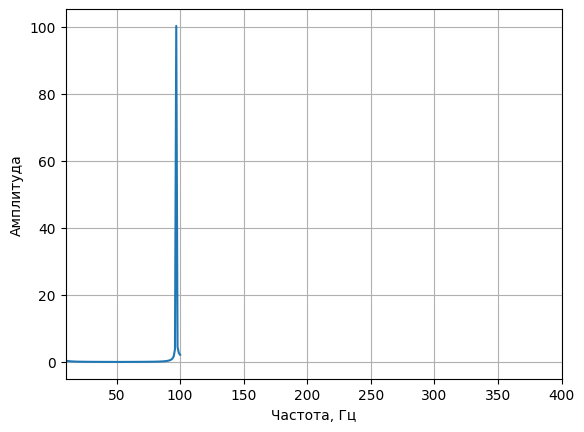

In [56]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

N = 10
x = np.linspace(0,100,100)
# xf = np.fft.fft(x)
yf = np.fft.fft(y)
# plt.subplot(221)
# plt.plot(xf,yf)
plt.plot(x,abs(yf))
plt.xlim(10,400)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
# print(x_new)

Text(0, 0.5, 'Амплитуда')

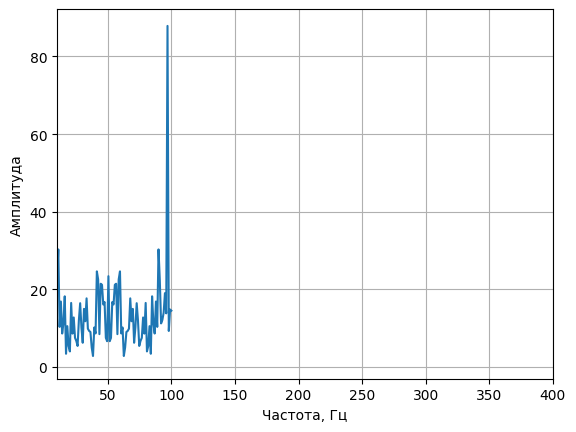

In [58]:
y = y+ np.random.normal(0,1,y.shape)

N = 10
 
yf = np.fft.fft(y)
# yf = np.fft.fft(x)
# plt.subplot(221)
# plt.plot(xf,yf)
plt.plot(x,abs(yf))
plt.grid()
plt.xlim(10,400)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')